## К алгоритму kNN, представленному на уроке, добавлены веса в зависимости от расстояния до объекта 

Я игрался с фактором веса и возведение в степень порядкового номера вовсе не повлияло на результат. 
Вот такой механизм мне показался интересным - он немного обесценивает вес дальнейших точек, но делает это не так, резко, как возведение в степень :

Таким образом, что расстояние до первого (ближайшего) объекта учитывается с весом = 2, до второго = с весом =1+1/2, третьего = с весом =1+1/3 и так далее.

Наверное для того, чтобы во всех этих играх с весом был смысл нужны многомерные данные, где одному из измерений есть смысл (с учетом типа данных) давать больший или пониженый вес

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

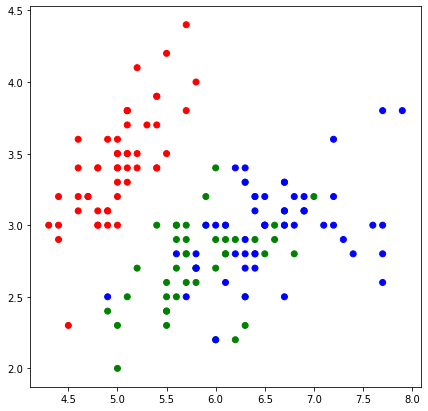

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def make_weights(k, distances):
    result = np.zeros(k, dtype=np.float32)
    sum = 0.0
    for i in range(k):
        result[i] += 1.0 / distances[i]
        sum += result[i]
    result /= sum
    return result

In [7]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
        weighted_test_distances = []    
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
                        
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
       
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for n, itm in enumerate(sorted(test_distances)):
            factor = n+1
            obj = np.float32(itm[0])
            #корректирую расстояния, по которым будет идти сортировка, на вес равный 1+1/номер элемента
            weighted_test_distances.append((obj+obj*(1/factor),itm[1]))
#           
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(weighted_test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [9]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.800


In [10]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.733


Построим график распределения классов.

In [11]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

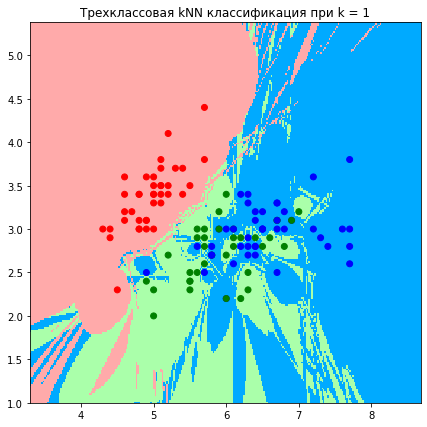

In [12]:
get_graph(X_train, y_train, k)

In [13]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.800


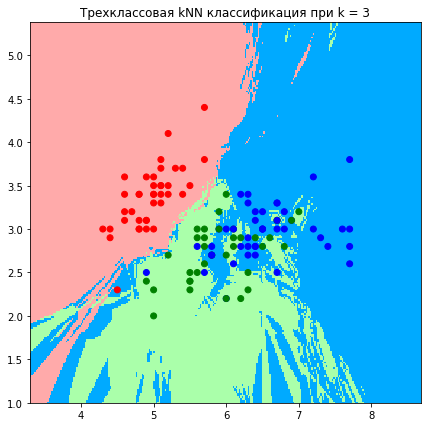

In [14]:
get_graph(X_train, y_train, k)

In [15]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.767


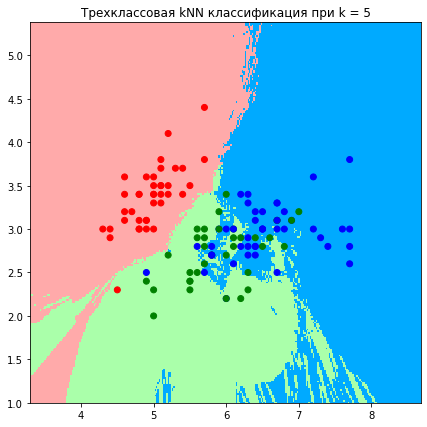

In [16]:
get_graph(X_train, y_train, k)

In [17]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.800


In [ ]:
get_graph(X_train, y_train, k)

## Домашнее задание

1. К алгоритму kNN, представленному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.